In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
df = pd.read_csv(r"/content/globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,76,79,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2.0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1.0,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5.0,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8.0,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4.0,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,3.227900e+04,32279.000000,32279.000000,32279.000000,32279.000000,32279.000000,32278.000000,30589.000000,3.058900e+04,32278.000000,32278.000000,32278.000000,32278.000000,32278.000000,32278.000000,5460.000000,32278.000000,32278.000000,32278.000000,32278.000000,39.000000,2.000000,32278.000000,30617.000000,32084.000000,387.000000,292.000000,350.000000,63.000000,46.000000,62.000000,0.0,32278.000000,95.000000,11.000000,32278.000000,5567.000000,1111.000000,1115.000000,283.000000,19.000000,18.000000,8.0,8.000000,35.000000,32278.000000,26452.000000,2208.000000,1843.000000,345.000000,301.000000,66.000000,62.000000,26664.000000,2057.000000,2221.000000,24878.000000,2018.000000,1960.000000,32278.000000,13711.000000,6.669000e+03,32107.000000,2319.000000,2319.000000,650.000000,444.000000,31950.000000,5.050000e+02,1.0,1.120000e+02,2.0,871.000000,660.000000,32278.000000,32278.000000,32278.000000,32278.000000
mean,1.981298e+11,1981.235385,6.278912,15.230552,0.016202,159.216302,5.123707,19.041356,-2.849611e+03,1.388438,0.023267,0.992286,0.992905,0.849867,-1.271392,1.148718,0.085011,0.918954,0.000898,3.136626,4.692308,3.000000,7.438193,43.522683,130.810622,9.049096,47.726027,175.828571,6.476190,41.021739,136.467742,NaN,0.054836,0.210526,0.090909,0.001642,4.386204,-75.182718,-0.054709,4.583039,0.947368,5.611111,1.0,8.000000,0.257143,6.630213,10.570203,6.423007,9.748779,6.556522,9.651163,6.287879,10.467742,2.194232,0.292173,0.624043,1.738162,0.769078,0.070408,0.707541,3.480271,2.555269e+05,0.072227,1.294955,0.120310,25.118462,36.950450,0.015994,3.460192e+06,20000.0,1.107577e+06,0.0,2.944891,10.312121,-3.222474,-3.180247,0.166894,-2.413563
std,4.229592e+08,4.231298,3.347743,8.851520,0.126256,147.811661,3.209911,25.567871,4.927804e+05,1.077241,0.150751,0.087493,0.083932,0.357207,3.393636,0.444222,0.278903,0.272910,0.029961,1.947140,2.483142,1.414214,6.621680,32.360387,74.966940,6.857179,29.737690,125.260322,5.972672,28.665495,75.170346,NaN,0.227664,0.409845,0.301511,0.040489,77.779821,42.908849,1.735588,3.123236,0.229416,3.821593,0.0,2.828427,0.443440,2.441091,7.163764,1.881986,7.061029,2.147976,7.775254,1.516729,7.787585,9.604529,5.438881,3.121350,11.559745,16.989401,0.382280,0.684865,0.524833,6.967568e+06,0.258868,449.533266,3.816625,155.219426,182.578787,0.125453,4.489349e+07,NaN,4.330667e+06,0.0,1.355006,35.518225,4.402171,4.458222,0.804069,4.349982
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,11.000000,1.000000,7.000000,6.000000,NaN,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.979040e+11,1979.000000,3.000000,8.000000,0.000000,61.000000,2.000000,5.731036,-7.951879e+01,1.000000,0.000000,1.000000,1.000000,1.

In [6]:
df.info

<bound method DataFrame.info of             eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0      1.970000e+11   1970       7     2  ...      0.0       0.0     0.0      NaN
1      1.970000e+11   1970       0     0  ...      1.0       1.0     1.0      NaN
2      1.970010e+11   1970       1     0  ...     -9.0       1.0     1.0      NaN
3      1.970010e+11   1970       1     0  ...     -9.0       1.0     1.0      NaN
4      1.970010e+11   1970       1     0  ...     -9.0       1.0     1.0      NaN
...             ...    ...     ...   ...  ...      ...       ...     ...      ...
32274  1.987090e+11   1987       9    26  ...      0.0       0.0     0.0      NaN
32275  1.987090e+11   1987       9    27  ...      1.0       0.0     1.0      NaN
32276  1.987090e+11   1987       9    28  ...      0.0       0.0     0.0      NaN
32277  1.987090e+11   1987       9    28  ...      0.0       0.0     0.0      NaN
32278  1.987090e+11   1987       9    28  ...      NaN       NaN  

In [7]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [9]:
#deleting unnecessary data
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [10]:
df.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [13]:
df.isnull().sum()

Year              0
Month             0
day               0
Country           1
State           122
Region            1
City              1
latitude       1690
longitude      1690
Attacktype        1
kill           5615
Wound          7401
target1         370
summary       31168
Group             1
Targettype        1
Weapon            1
motive        31439
dtype: int64

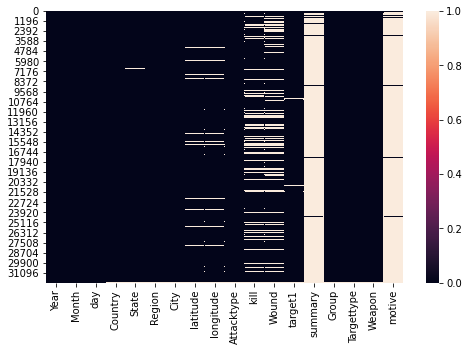

In [16]:
plt.figure(figsize=(8,5))
ax = sns.heatmap(df.isnull())

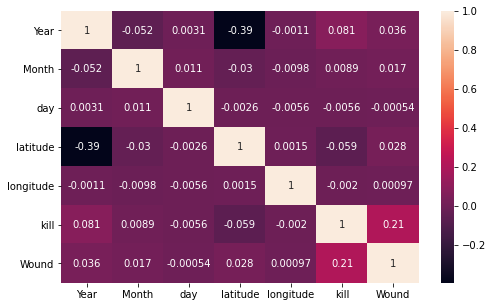

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

In [17]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['City'].value_counts().index[1]) 
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])

Country with the most attacks: El Salvador
City with the most attacks: Lima
Region with the most attacks: Western Europe
Year with the most attacks: 1984
Month with the most attacks: 5
Group with the most attacks: Shining Path (SL)


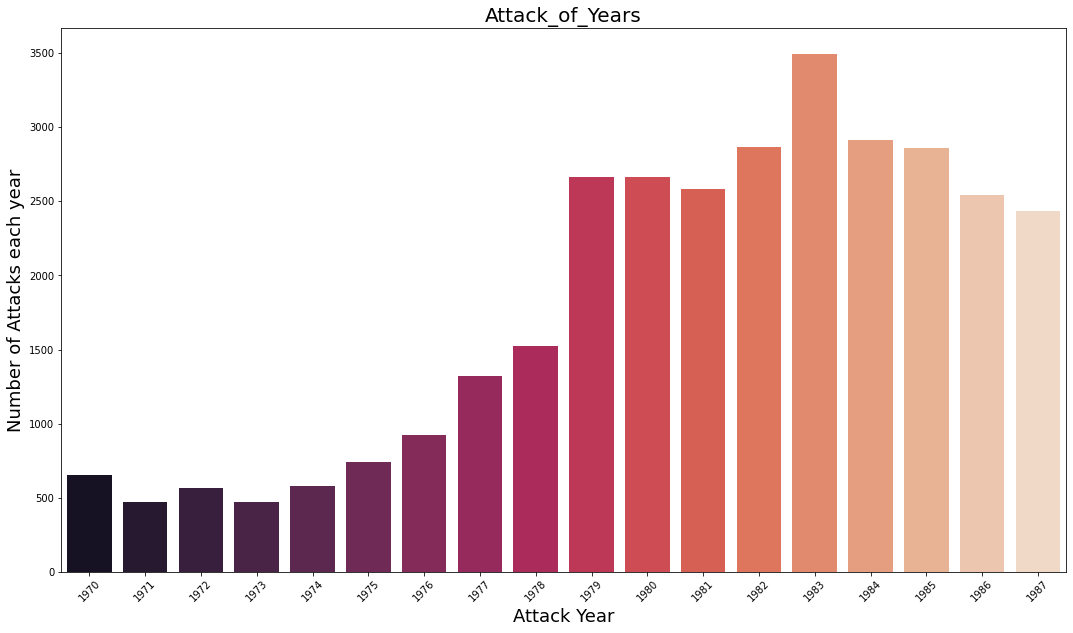

In [22]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year',size = 18)
plt.ylabel('Number of Attacks each year',size=18)
plt.title('Attack_of_Years',size=20)
plt.show()

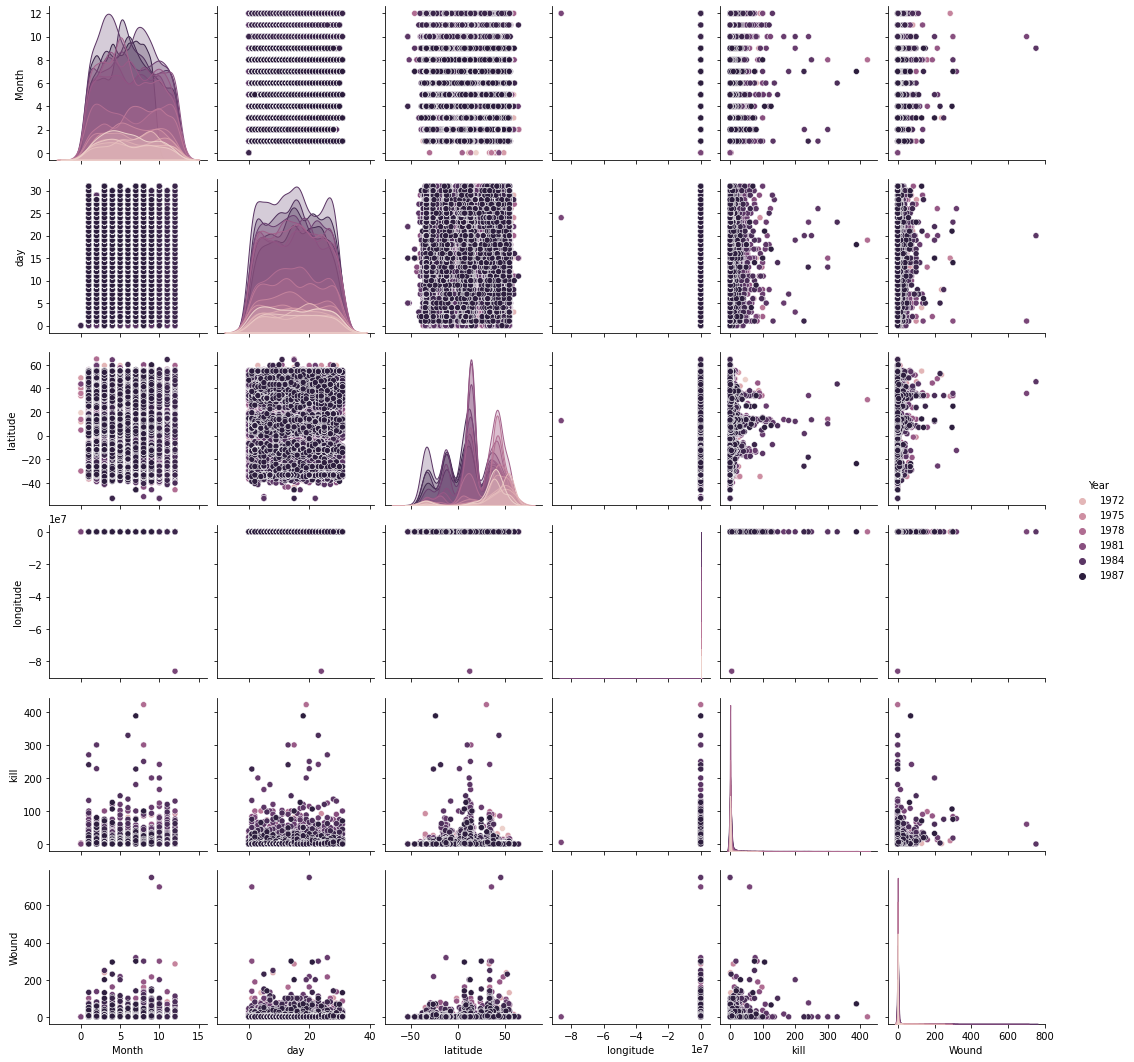

In [19]:
sns.pairplot(df , hue = 'Year')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


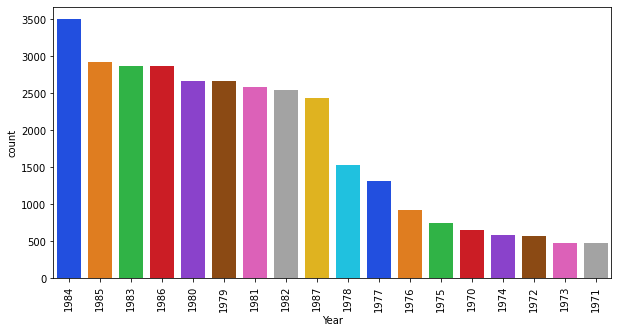

In [24]:
plt.figure(figsize=(10,5))
sns.countplot("Year", data=df,order=df["Year"].value_counts().index, palette="bright")
plt.xticks(rotation=90)
plt.show()